In [123]:
# Import required libraries
import pandas as pd
import numpy as np
import math

#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import Date-Time Libraries
import datetime
import matplotlib.dates as mdates

In [124]:
# Read AQI data file for years 2017 - 2021 by county
df_aqi_2017_2021 = pd.read_csv('/Users/nkichili/Desktop/Synopsys/daily_aqi_by_county_2017_2021.csv')

In [125]:
df_aqi_2017_2021.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [126]:
df_aqi_2017_2021 = df_aqi_2017_2021.rename(columns={"county Name": "county","State Name":"state"})
df_aqi_2017_2021['Date'] = pd.to_datetime(df_aqi_2017_2021['Date'])

In [127]:
# Select the required Columns
aqi_cols = ['state','county','Date','AQI','Category']

# Assign a new dataframe for reduced columns
df_aqi_2017_2021_cols = df_aqi_2017_2021[aqi_cols]
df_aqi_2017_2021_cols.head()

,state,county,Date,AQI,Category
0,Alabama,Baldwin,2017-01-01,21,Good
1,Alabama,Baldwin,2017-01-04,22,Good
2,Alabama,Baldwin,2017-01-10,19,Good
3,Alabama,Baldwin,2017-01-13,30,Good
4,Alabama,Baldwin,2017-01-16,16,Good


In [128]:
df_aqi_2017_2021_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582819 entries, 0 to 1582818
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   state     1582819 non-null  object        
 1   county    1582819 non-null  object        
 2   Date      1582819 non-null  datetime64[ns]
 3   AQI       1582819 non-null  int64         
 4   Category  1582819 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 60.4+ MB


In [129]:
df_aqi_2017_2021_cols.county.unique()

array(['Baldwin', 'Clay', 'Colbert', 'DeKalb', 'Elmore', 'Etowah',
       'Houston', 'Jefferson', 'Lawrence', 'Madison', 'Mobile',
       'Montgomery', 'Morgan', 'Russell', 'Shelby', 'Sumter', 'Talladega',
       'Tuscaloosa', 'Aleutians East ', 'Anchorage ', 'Denali ',
       'Fairbanks North Star ', 'Juneau ', 'Kenai Peninsula ',
       'Matanuska-Susitna ', 'Apache', 'Cochise', 'Coconino', 'Gila',
       'La Paz', 'Maricopa', 'Mohave', 'Navajo', 'Pima', 'Pinal',
       'Santa Cruz', 'Yavapai', 'Yuma', 'Arkansas', 'Ashley', 'Clark',
       'Crittenden', 'Garland', 'Jackson', 'Newton', 'Polk', 'Pulaski',
       'Union', 'Washington', 'Alameda', 'Amador', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', '

In [130]:
# Read NYT Covid Cases data file for years 2020 - 2022 Feb by county
df_covid_2017_2021 = pd.read_csv('/Users/nkichili/Desktop/Synopsys/us-counties-2020_2022 Feb.csv')

In [131]:
df_covid_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231222 entries, 0 to 2231221
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   geoid                object 
 2   county Name          object 
 3   state                object 
 4   cases                int64  
 5   cases_avg            float64
 6   cases_avg_per_100k   float64
 7   deaths               int64  
 8   deaths_avg           float64
 9   deaths_avg_per_100k  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 170.2+ MB


In [132]:
df_covid_2017_2021 = df_covid_2017_2021.rename(columns={"county Name": "county","State Name":"state"})
df_covid_2017_2021['Date'] = pd.to_datetime(df_covid_2017_2021['Date'])

In [133]:
df_covid_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231222 entries, 0 to 2231221
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   geoid                object        
 2   county               object        
 3   state                object        
 4   cases                int64         
 5   cases_avg            float64       
 6   cases_avg_per_100k   float64       
 7   deaths               int64         
 8   deaths_avg           float64       
 9   deaths_avg_per_100k  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 170.2+ MB


In [134]:
#rslt_df = df_covid_2017_2021.loc[(df_covid_2017_2021['county'] == "New York City")]
df_covid_2017_2021 = df_covid_2017_2021.replace(['New York City'],'New York')

In [135]:
#rslt_df.head()

In [136]:
# Select the required Columns
covid_cols = ['Date','county','state','cases']

# Assign a new dataframe for reduced columns
df_covid_2017_2021_cols = df_covid_2017_2021[covid_cols]
df_covid_2017_2021_cols.head(-200)

,Date,county,state,cases
0,2020-01-21,Snohomish,Washington,1
1,2020-01-22,Snohomish,Washington,0
2,2020-01-23,Snohomish,Washington,0
3,2020-01-24,Snohomish,Washington,0
4,2020-01-24,Cook,Illinois,1
...,...,...,...,...
2231017,2022-02-16,Glenn,California,8
2231018,2022-02-16,Fresno,California,313
2231019,2022-02-16,El Dorado,California,73
2231020,2022-02-16,Del Norte,California,0


In [138]:
# Merge AQI and Covid data on Date and County
df_merged = pd.merge(df_aqi_2017_2021_cols, df_covid_2017_2021_cols, on=['Date','state','county'], how='left')
df_merged.to_csv('/Users/nkichili/Desktop/Synopsys/AQI_COVIDNYT_Merged.csv', index=False)


In [71]:
#df_merged.set_index ('Date')

In [94]:
df_merged.head()

,state,county,Date,AQI,Category,cases
0,Alabama,Baldwin,2017-01-01,21,Good,NaN
1,Alabama,Baldwin,2017-01-04,22,Good,NaN
2,Alabama,Baldwin,2017-01-10,19,Good,NaN
3,Alabama,Baldwin,2017-01-13,30,Good,NaN
4,Alabama,Baldwin,2017-01-16,16,Good,NaN


In [95]:
df_merged['cases'] = df_merged['cases'].fillna(0)

In [96]:
df_merged.head()

,state,county,Date,AQI,Category,cases
0,Alabama,Baldwin,2017-01-01,21,Good,0.0
1,Alabama,Baldwin,2017-01-04,22,Good,0.0
2,Alabama,Baldwin,2017-01-10,19,Good,0.0
3,Alabama,Baldwin,2017-01-13,30,Good,0.0
4,Alabama,Baldwin,2017-01-16,16,Good,0.0


In [97]:
df_merged.sort_values('Date')

,state,county,Date,AQI,Category,cases
0,Alabama,Baldwin,2017-01-01,21,Good,0.0
110738,Kentucky,Daviess,2017-01-01,37,Good,0.0
29863,California,Shasta,2017-01-01,38,Good,0.0
168646,Montana,Ravalli,2017-01-01,62,Moderate,0.0
110458,Kentucky,Christian,2017-01-01,18,Good,0.0
...,...,...,...,...,...,...
1381428,California,San Diego,2021-11-08,40,Good,1742.0
1375052,California,Colusa,2021-11-08,57,Moderate,10.0
1381429,California,San Diego,2021-11-09,40,Good,392.0
1375053,California,Colusa,2021-11-09,45,Good,3.0


In [98]:
df_merged.county.unique()

array(['Baldwin', 'Clay', 'Colbert', 'DeKalb', 'Elmore', 'Etowah',
       'Houston', 'Jefferson', 'Lawrence', 'Madison', 'Mobile',
       'Montgomery', 'Morgan', 'Russell', 'Shelby', 'Sumter', 'Talladega',
       'Tuscaloosa', 'Aleutians East ', 'Anchorage ', 'Denali ',
       'Fairbanks North Star ', 'Juneau ', 'Kenai Peninsula ',
       'Matanuska-Susitna ', 'Apache', 'Cochise', 'Coconino', 'Gila',
       'La Paz', 'Maricopa', 'Mohave', 'Navajo', 'Pima', 'Pinal',
       'Santa Cruz', 'Yavapai', 'Yuma', 'Arkansas', 'Ashley', 'Clark',
       'Crittenden', 'Garland', 'Jackson', 'Newton', 'Polk', 'Pulaski',
       'Union', 'Washington', 'Alameda', 'Amador', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', '

In [99]:
df_merged_LA = df_merged.loc[df_merged['county'].isin(['Los Angeles'])]
df_merged_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 20753 to 1377699
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     1643 non-null   object        
 1   county    1643 non-null   object        
 2   Date      1643 non-null   datetime64[ns]
 3   AQI       1643 non-null   int64         
 4   Category  1643 non-null   object        
 5   cases     1643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 89.9+ KB


In [100]:
df_merged_NY = df_merged.loc[df_merged['county'].isin(['New York'])]
df_merged_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 193719 to 1489055
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     1735 non-null   object        
 1   county    1735 non-null   object        
 2   Date      1735 non-null   datetime64[ns]
 3   AQI       1735 non-null   int64         
 4   Category  1735 non-null   object        
 5   cases     1735 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 94.9+ KB


In [109]:
df_merged_HS = df_merged.loc[df_merged['county'].isin(['Houston'])]
df_merged_HS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 1616 to 1404663
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     2443 non-null   object        
 1   county    2443 non-null   object        
 2   Date      2443 non-null   datetime64[ns]
 3   AQI       2443 non-null   int64         
 4   Category  2443 non-null   object        
 5   cases     2443 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 133.6+ KB


In [110]:
df_merged_DT = df_merged.loc[df_merged['county'].isin(['Wayne'])]
df_merged_DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 146903 to 1493027
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     3610 non-null   object        
 1   county    3610 non-null   object        
 2   Date      3610 non-null   datetime64[ns]
 3   AQI       3610 non-null   int64         
 4   Category  3610 non-null   object        
 5   cases     3610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 197.4+ KB


In [112]:
start_date = '01-01-2020'
end_date = '12-31-2021'
mask_LA = (df_merged_LA['Date'] > start_date) & (df_merged_LA['Date'] <= end_date)
df_merged_LA = df_merged_LA.loc[mask_LA]

mask_NY = (df_merged_NY['Date'] > start_date) & (df_merged_NY['Date'] <= end_date)
df_merged_NY = df_merged_NY.loc[mask_NY]

mask_HS = (df_merged_HS['Date'] > start_date) & (df_merged_HS['Date'] <= end_date)
df_merged_HS = df_merged_HS.loc[mask_HS]

mask_DT = (df_merged_DT['Date'] > start_date) & (df_merged_DT['Date'] <= end_date)
df_merged_DT = df_merged_DT.loc[mask_DT]

<AxesSubplot:xlabel='Date', ylabel='cases'>

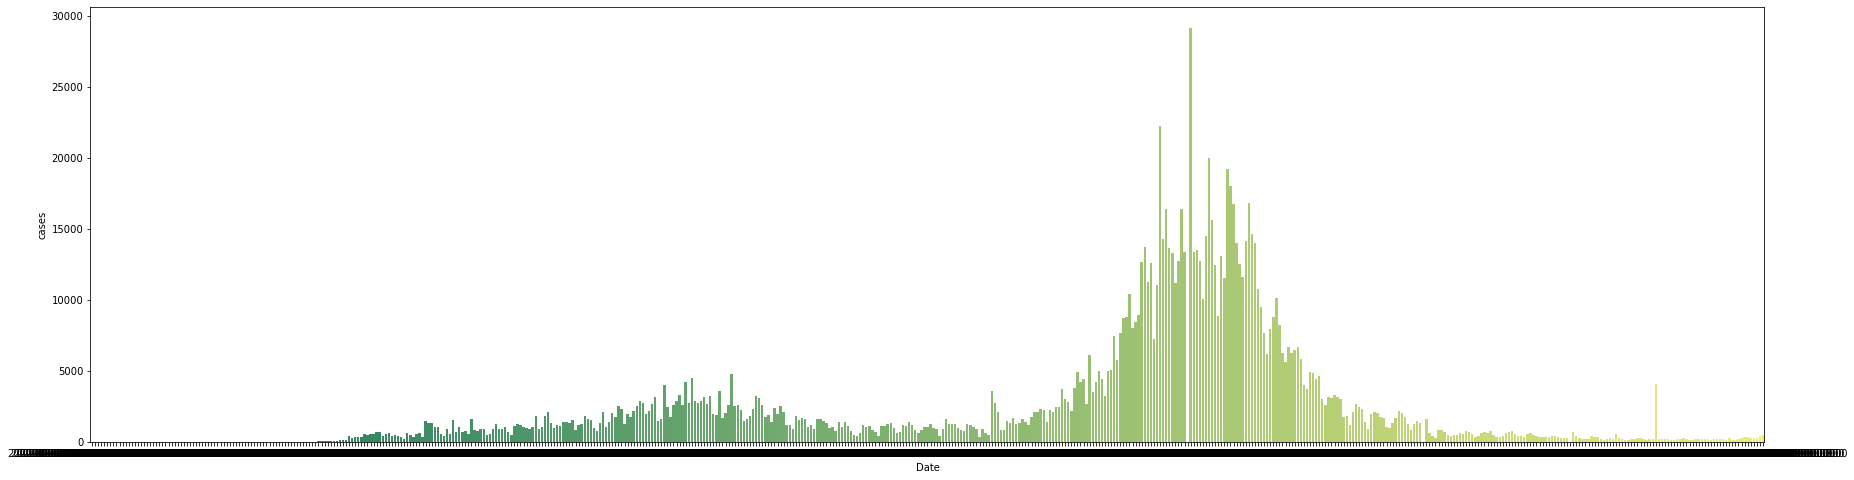

In [113]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.barplot(x='Date', y='cases', data = df_merged_LA, palette='summer')
#ax2 = plt.twinx()
#sns.lineplot(data=df_merged_LA.cases, color="b", ax=ax2)

<AxesSubplot:xlabel='Date', ylabel='AQI'>

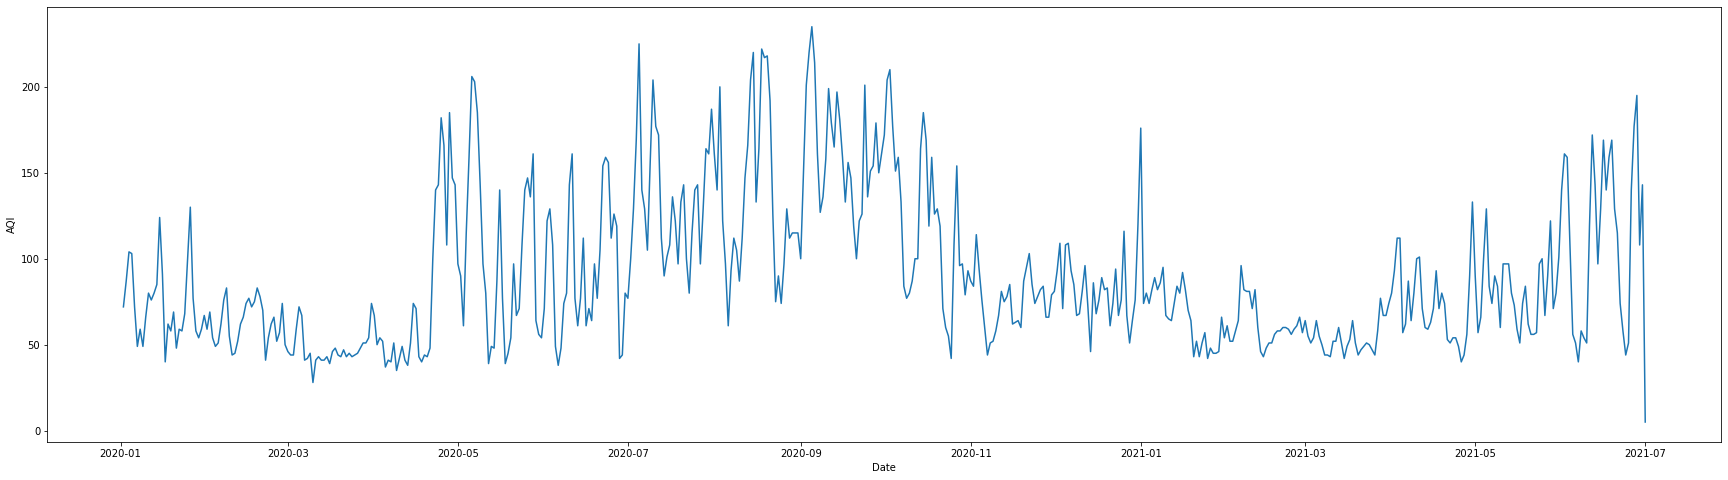

In [114]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.lineplot(x='Date', y='AQI', data = df_merged_LA, sort=False)

<AxesSubplot:xlabel='Date', ylabel='cases'>

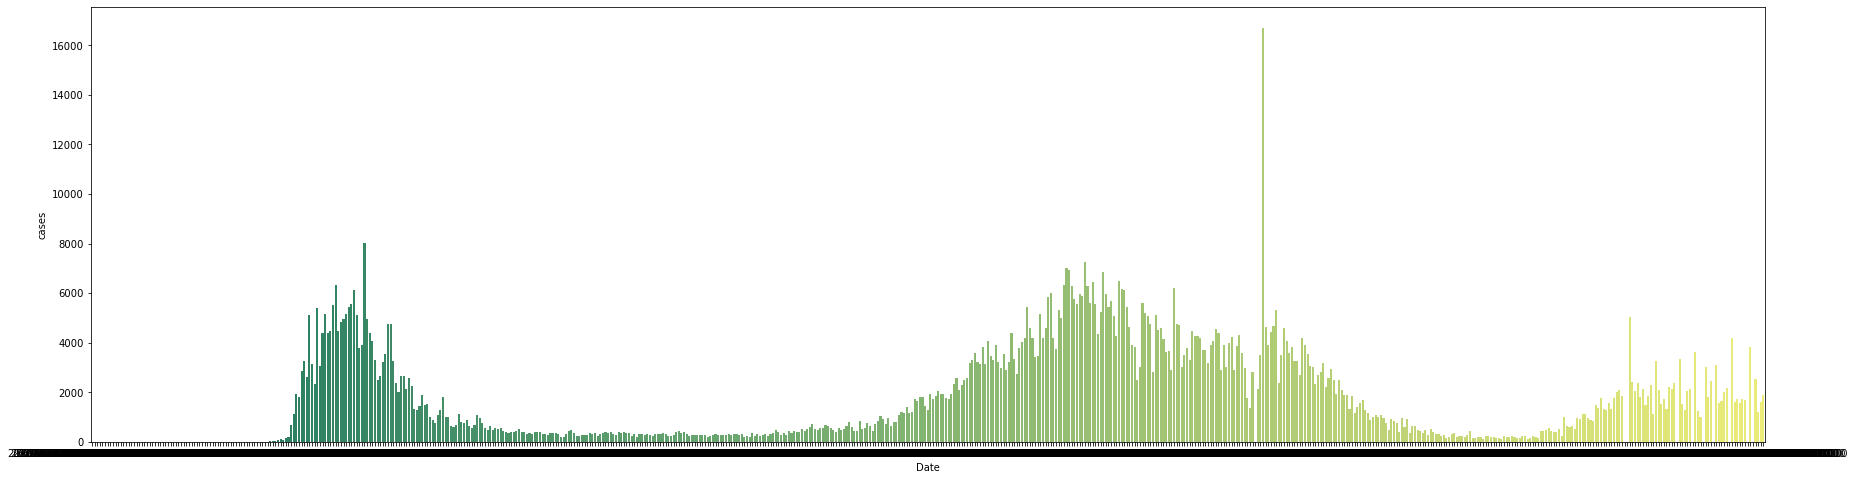

In [115]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.barplot(x='Date', y='cases', data = df_merged_NY, palette='summer')
#ax2 = plt.twinx()
#sns.lineplot(data=df_merged_LA.cases, color="b", ax=ax2)

<AxesSubplot:xlabel='Date', ylabel='AQI'>

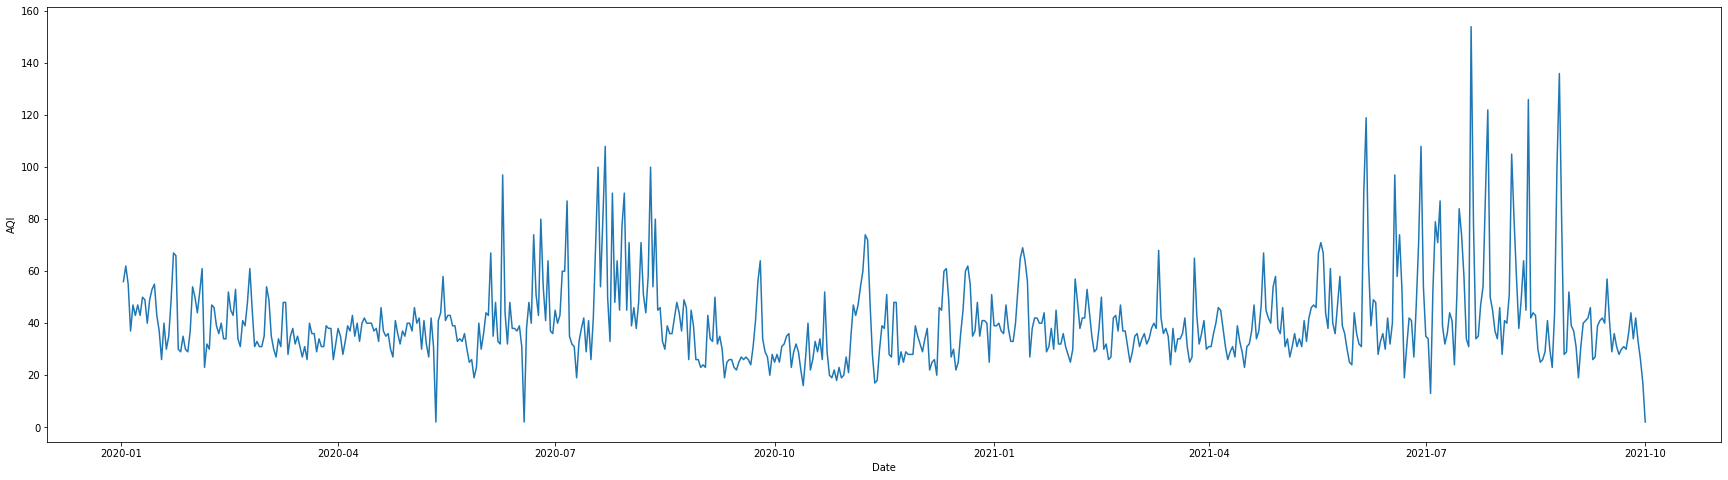

In [116]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.lineplot(x='Date', y='AQI', data = df_merged_NY, sort=False)

<AxesSubplot:xlabel='Date', ylabel='cases'>

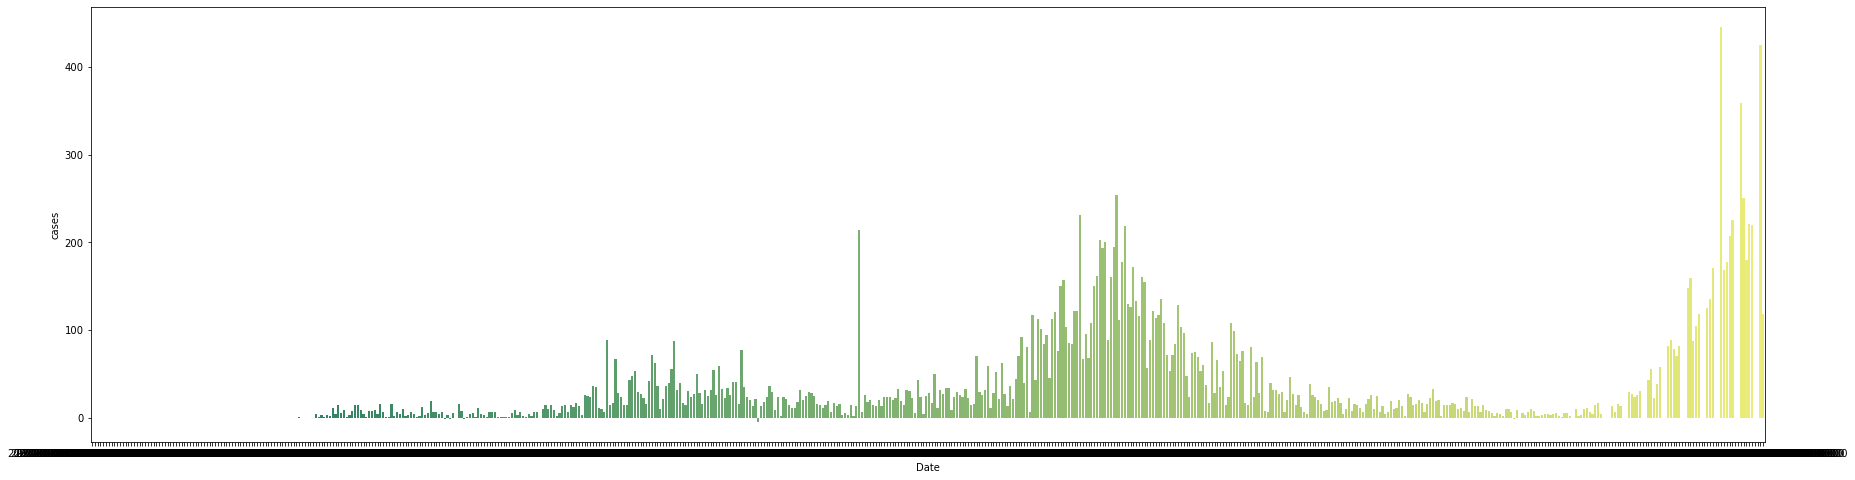

In [117]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.barplot(x='Date', y='cases', data = df_merged_HS, palette='summer')
#ax2 = plt.twinx()
#sns.lineplot(data=df_merged_LA.cases, color="b", ax=ax2)

<AxesSubplot:xlabel='Date', ylabel='AQI'>

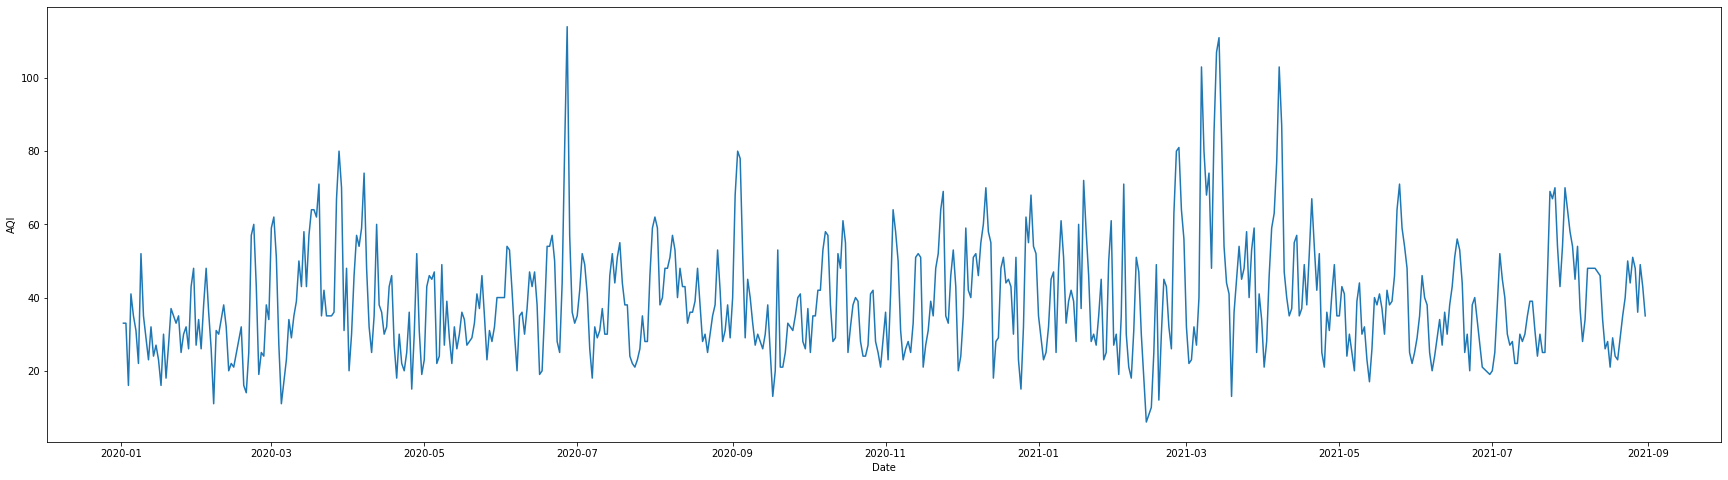

In [118]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.lineplot(x='Date', y='AQI', data = df_merged_HS, sort=False)

<AxesSubplot:xlabel='Date', ylabel='cases'>

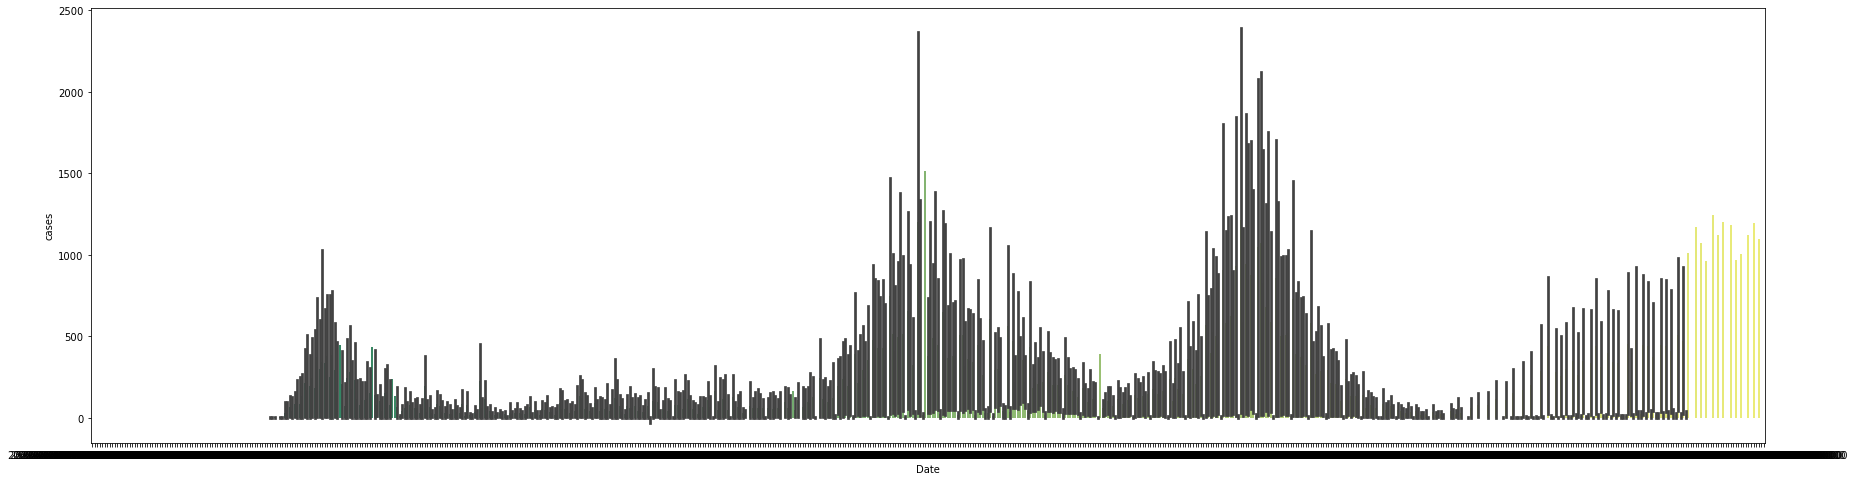

In [119]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.barplot(x='Date', y='cases', data = df_merged_DT, palette='summer')
#ax2 = plt.twinx()
#sns.lineplot(data=df_merged_LA.cases, color="b", ax=ax2)

<AxesSubplot:xlabel='Date', ylabel='AQI'>

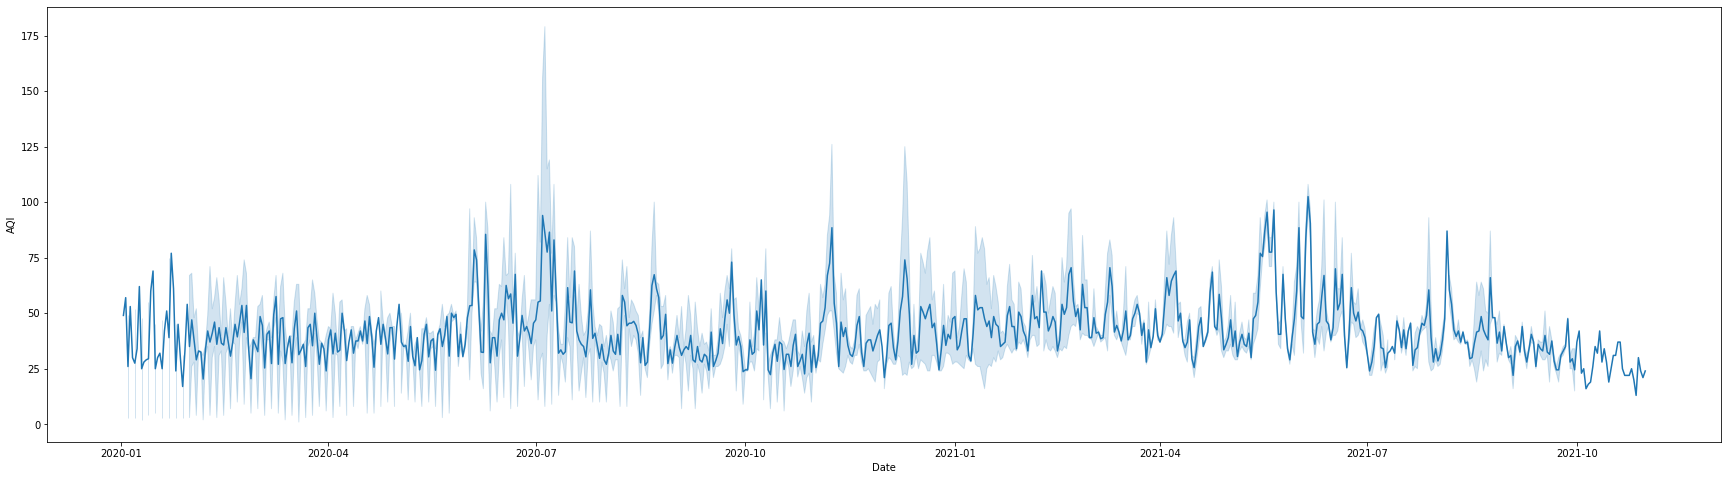

In [120]:
plt.figure(figsize=(30,8))
#sns.lineplot(data=df_merged_LA.AQI, color="g")
sns.lineplot(x='Date', y='AQI', data = df_merged_DT, sort=False)